In [1]:
# The data is saved as customer_churn.csv. Here are the fields and their definitions:

# Name : Name of the latest contact at Company

# Age: Customer Age

# Total_Purchase: Total Ads Purchased

# Account_Manager: Binary 0=No manager, 1= Account manager assigned

# Years: Totaly Years as a customer

# Num_sites: Number of websites that use the service.

# Onboard_date: Date that the name of the latest contact was onboarded

# Location: Client HQ Address

# Company: Name of Client Company

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\ml\\Random_Forest\\customer_churn.csv")

In [4]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
#Lets first study our datasets

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [8]:
#checking for null values 

In [9]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [10]:
#checking for duplicate values
df.duplicated().sum()

0

In [11]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [12]:
#Now lets divide our Onboard_date to data and time format

In [13]:
#Converting the Onboard_date column to datetime data type

df["Onboard_date"] = pd.to_datetime(df["Onboard_date"])

#Now lets add a new column for the date
df["Date"] = df["Onboard_date"].dt.date

#Now lets add a new column for the time
df["time"] = df["Onboard_date"].dt.time

#Now lets drop our old Onboard_date column

df = df.drop(columns = ["Onboard_date"])

In [14]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Location,Company,Churn,Date,time
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,2013-08-30,07:00:40
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,2013-08-13,00:38:46
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,2016-06-29,06:20:07
3,Phillip White,42.0,8010.76,0,6.71,10.0,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,2014-04-22,12:43:12
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,2016-01-19,15:31:15


In [15]:
#Now lets remove the unnessary columns from our dataset

df = df.drop(columns = ["Names","Location"])

In [16]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Company,Churn,Date,time
0,42.0,11066.80,0,7.22,8.0,Harvey LLC,1,2013-08-30,07:00:40
1,41.0,11916.22,0,6.50,11.0,Wilson PLC,1,2013-08-13,00:38:46
2,38.0,12884.75,0,6.67,12.0,"Miller, Johnson and Wallace",1,2016-06-29,06:20:07
3,42.0,8010.76,0,6.71,10.0,Smith Inc,1,2014-04-22,12:43:12
4,37.0,9191.58,0,5.56,9.0,Love-Jones,1,2016-01-19,15:31:15


In [17]:
#Now lets move to visualisation part

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    int64  
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Company          900 non-null    object 
 6   Churn            900 non-null    int64  
 7   Date             900 non-null    object 
 8   time             900 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 63.4+ KB


In [19]:
import seaborn as sns

<AxesSubplot:>

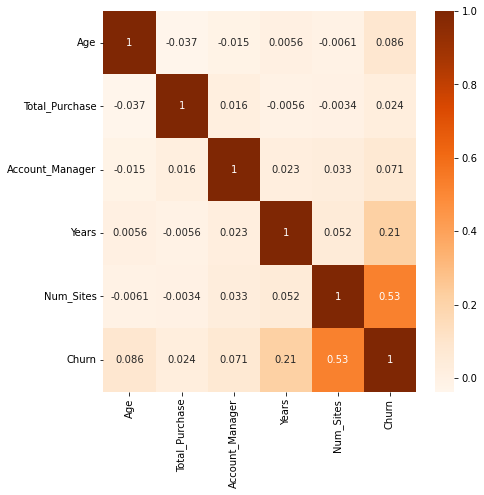

In [20]:
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(),annot = True,cmap = "Oranges")
#we can see a positive relationship between years and churn that is when the number of years increases the
# the customers is churning out

# we can also see a positive relationship between churn and number of sites that is 
# when the number of sites increases for a perticular customer he or she is churning out

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

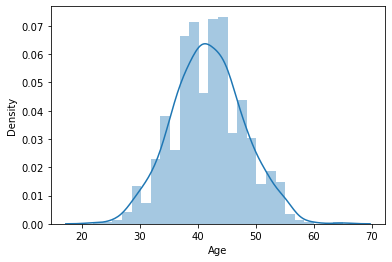

In [21]:
#lets check if our data is normally distributed or not for this we will be taking the age group 

sns.distplot(df["Age"])

# so here we can clearly see that the distribution is symetrical and we can move forward considering our 
# rest of the data is normally distributed

In [22]:
#Now lets do categorise our age group

In [23]:
bins = [0,10,20,30,40,50,60]
df["Age_bin"] =pd.cut(df["Age"],bins) 

In [24]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Company,Churn,Date,time,Age_bin
0,42.0,11066.80,0,7.22,8.0,Harvey LLC,1,2013-08-30,07:00:40,"(40, 50]"
1,41.0,11916.22,0,6.50,11.0,Wilson PLC,1,2013-08-13,00:38:46,"(40, 50]"
2,38.0,12884.75,0,6.67,12.0,"Miller, Johnson and Wallace",1,2016-06-29,06:20:07,"(30, 40]"
3,42.0,8010.76,0,6.71,10.0,Smith Inc,1,2014-04-22,12:43:12,"(40, 50]"
4,37.0,9191.58,0,5.56,9.0,Love-Jones,1,2016-01-19,15:31:15,"(30, 40]"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              900 non-null    float64 
 1   Total_Purchase   900 non-null    float64 
 2   Account_Manager  900 non-null    int64   
 3   Years            900 non-null    float64 
 4   Num_Sites        900 non-null    float64 
 5   Company          900 non-null    object  
 6   Churn            900 non-null    int64   
 7   Date             900 non-null    object  
 8   time             900 non-null    object  
 9   Age_bin          899 non-null    category
dtypes: category(1), float64(4), int64(2), object(3)
memory usage: 64.5+ KB


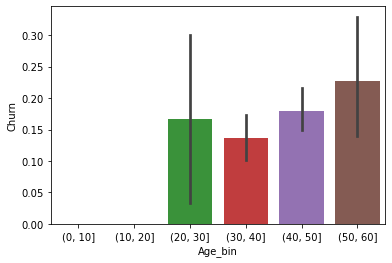

In [26]:
sns.barplot(x = "Age_bin",y = "Churn",data = df)
plt.show()

#here we can see that within an age group of 50-60 clients are opting out from the agency 
# And the second goes to the age group of 20-30

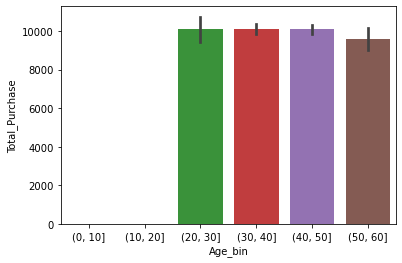

In [27]:
sns.barplot(x = "Age_bin",y = "Total_Purchase",data = df)
plt.show()

#Purchase amount is almost equally made by all the age group members

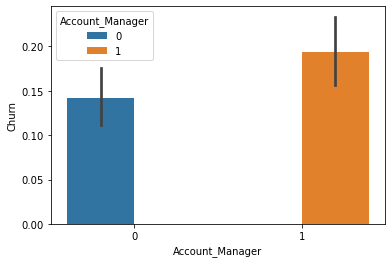

In [28]:
#Now lets see the involvment of Account_Manager having any affect

sns.barplot(x = "Account_Manager",y = "Churn",data = df, hue = "Account_Manager")
plt.show()

#its very intresting see that the when they are placing and account manager for a client, that perticular client is 
# likely to drop from the service so here from my understanding the Advertising company should keep a better 
# account manager or they might loose more cust

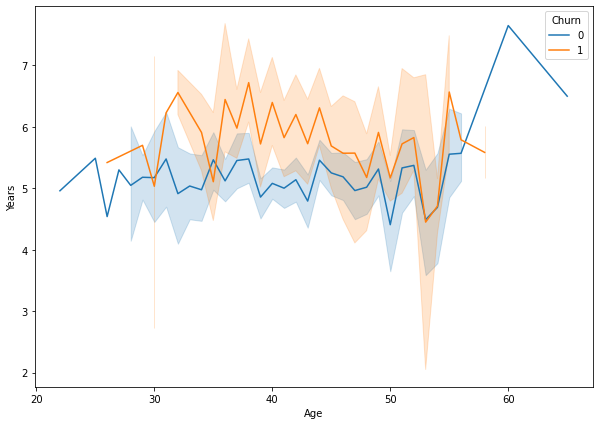

In [29]:
plt.figure(figsize = (10,7))
sns.lineplot(x = "Age",y = "Years",data = df,hue = "Churn")
plt.show()
# we can clearly see that the clients who using the service for more than 5 years are planning to leave the service 

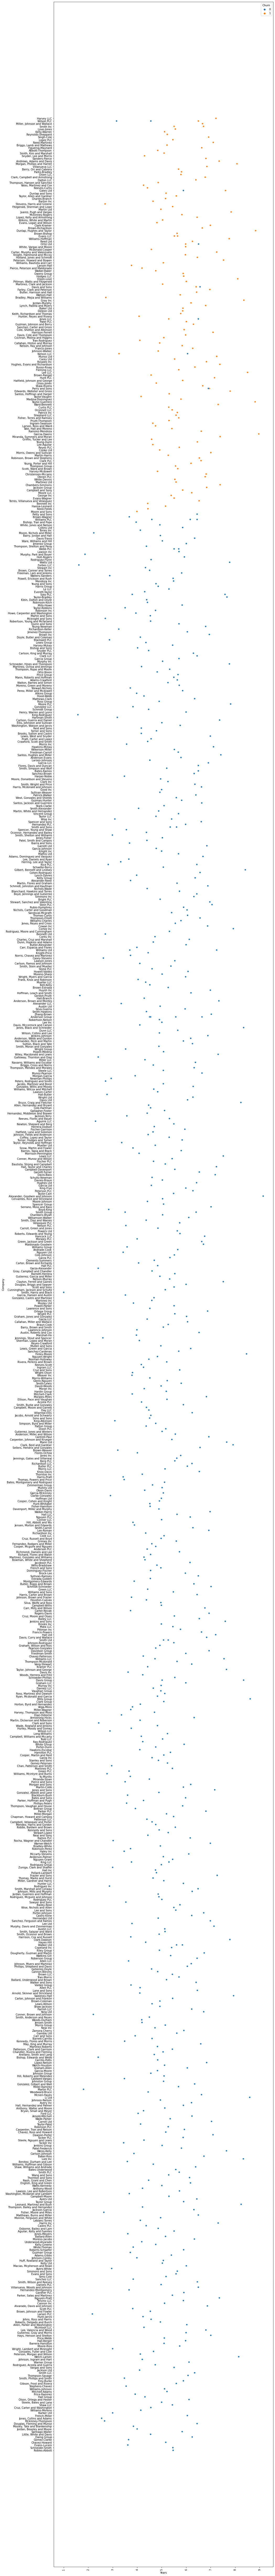

In [30]:
plt.figure(figsize = (15,180))
sns.scatterplot(x = "Years",y = "Company",data = df,hue = "Churn")
plt.xticks(rotation = 90)
plt.show()
# Checking the companies that are leaving the organisation

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              900 non-null    float64 
 1   Total_Purchase   900 non-null    float64 
 2   Account_Manager  900 non-null    int64   
 3   Years            900 non-null    float64 
 4   Num_Sites        900 non-null    float64 
 5   Company          900 non-null    object  
 6   Churn            900 non-null    int64   
 7   Date             900 non-null    object  
 8   time             900 non-null    object  
 9   Age_bin          899 non-null    category
dtypes: category(1), float64(4), int64(2), object(3)
memory usage: 64.5+ KB


In [32]:
#Now lets drop all the unnessary columns

df = df.drop(columns = ["Age","time"])

In [33]:
df.head()

,Total_Purchase,Account_Manager,Years,Num_Sites,Company,Churn,Date,Age_bin
0,11066.80,0,7.22,8.0,Harvey LLC,1,2013-08-30,"(40, 50]"
1,11916.22,0,6.50,11.0,Wilson PLC,1,2013-08-13,"(40, 50]"
2,12884.75,0,6.67,12.0,"Miller, Johnson and Wallace",1,2016-06-29,"(30, 40]"
3,8010.76,0,6.71,10.0,Smith Inc,1,2014-04-22,"(40, 50]"
4,9191.58,0,5.56,9.0,Love-Jones,1,2016-01-19,"(30, 40]"


In [34]:
#Lets now divide our dependent and independent data 
x = df.drop(columns = ["Churn"])

In [35]:
y = df["Churn"]

In [36]:
x.head()

,Total_Purchase,Account_Manager,Years,Num_Sites,Company,Date,Age_bin
0,11066.80,0,7.22,8.0,Harvey LLC,2013-08-30,"(40, 50]"
1,11916.22,0,6.50,11.0,Wilson PLC,2013-08-13,"(40, 50]"
2,12884.75,0,6.67,12.0,"Miller, Johnson and Wallace",2016-06-29,"(30, 40]"
3,8010.76,0,6.71,10.0,Smith Inc,2014-04-22,"(40, 50]"
4,9191.58,0,5.56,9.0,Love-Jones,2016-01-19,"(30, 40]"


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label = LabelEncoder()

In [40]:
col = list(x.columns)
for i in col:
    if x[i].dtype != "float64":
        x[i] = label.fit_transform(df[i])

In [41]:
x.head()

,Total_Purchase,Account_Manager,Years,Num_Sites,Company,Date,Age_bin
0,11066.80,0,7.22,8.0,325,566,2
1,11916.22,0,6.50,11.0,849,563,2
2,12884.75,0,6.67,12.0,499,772,1
3,8010.76,0,6.71,10.0,704,614,2
4,9191.58,0,5.56,9.0,458,741,1


In [42]:
#Now lets split our data to train and test set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 47)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(810, 7)
(90, 7)
(810,)
(90,)


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9

In [50]:
trees = range(100,1000,100)

In [51]:
trees

range(100, 1000, 100)

In [57]:
#now lets check with diffrent set of trees 
accuracy1 = []
for i in trees:
    model2 = RandomForestClassifier(n_estimators = i)
    model2.fit(x_train,y_train)
    y_pred = model2.predict(x_test)
    accuracy1.append(round((accuracy_score(y_pred,y_test)*100),2))
print(accuracy1)

[91.11, 90.0, 88.89, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0]


In [58]:
table = {"trees":[[i]for i in list(trees)],"Accuracy_Score":accuracy1}

In [59]:
tabel = pd.DataFrame(table)

In [60]:
tabel

,trees,Accuracy_Score
0,[100],91.11
1,[200],90.00
2,[300],88.89
3,[400],90.00
4,[500],90.00
5,[600],90.00
6,[700],90.00
7,[800],90.00
8,[900],90.00


In [ ]:
#so here we got an accuracy score of 91 percentage for our testing set 